In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
#from feature_engine.outliers import Winsorizer
#from scipy import stats
from sklearn.cluster import	KMeans
from sklearn.preprocessing import OneHotEncoder


In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [11]:
mall_data=pd.read_csv("Mall_Customers.csv")

In [13]:
mall_data.columns=["custId","Gender","Age","Income","Spend"]

In [15]:
seg_data=mall_data.iloc[:,1:]

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lc=LabelEncoder()
gender=lc.fit_transform(seg_data["Gender"])

In [21]:
seg_data.drop("Gender",axis=1,inplace=True)

In [23]:
seg_data["Gender"]=gender

In [25]:

TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(seg_data)
    TWSS.append(kmeans.inertia_)

C:\Users\eagle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eagle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eagle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eagle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\eagle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


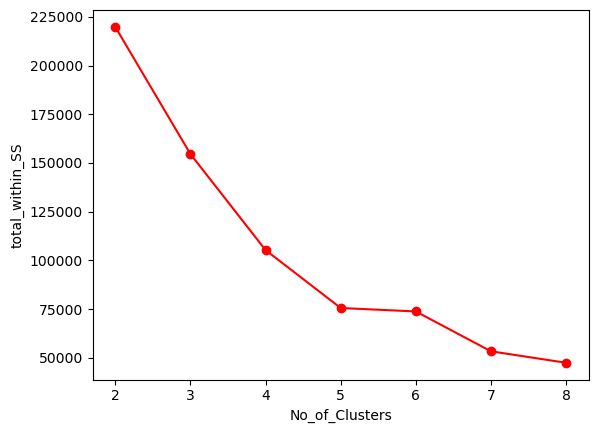

In [26]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(seg_data)

In [39]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
seg_data['clust'] = mb

In [43]:
centroids = model.cluster_centers_

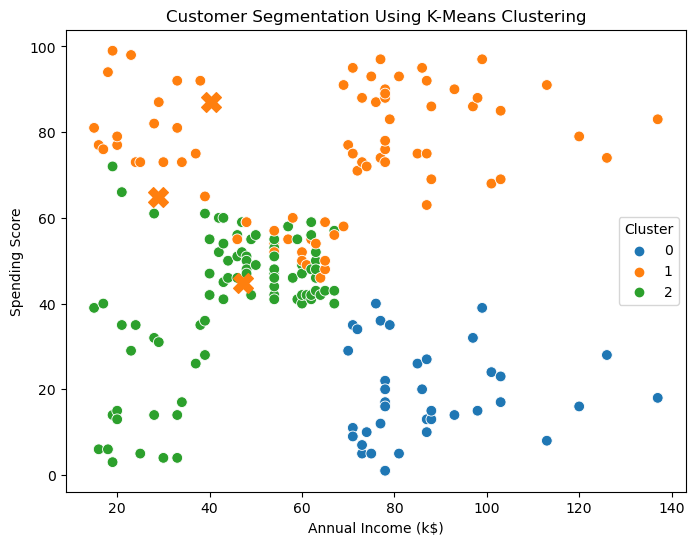

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Income',
    y='Spend',
    hue='clust',
    palette='tab10',
    data=seg_data,
    s=60
)

# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    marker='X'
)

plt.title("Customer Segmentation Using K-Means Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()